<a href="https://colab.research.google.com/github/FiraRamadani17/PortofolioBNSP/blob/main/World_Bank_Program_Budget_Analysis_Project_Portfolio_Satya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
os.listdir()

['CLEANING DAN FILTERING Barang.ipynb',
 'PRAKTIK MANDIRI CSP - SATYA_167',
 'LATIHAN MYSKILL.ipynb',
 'Untitled1.ipynb',
 'Classification with Naive Bayes_Satya.ipynb',
 'Prediction Model in FinanKu Fintech Imajiner For Portfolio.ipynb',
 'Data Analysis For Stack Overflow Annual Developer Survey.ipynb',
 'Converter',
 'Portfolio Data Analyst With Python.ipynb',
 'books.csv',
 'Latihan Python lagi.ipynb',
 'Classification Using Decision Tree Algorithm For Insurance Health.ipynb',
 'tiktok.csv',
 'LOMBA IFEST 2024.ipynb',
 'tiktok.xlsx',
 'Reporting My Activity on Tiktok Analysis.ipynb',
 'World_Bank_Program_Budget_and_All_Funds.csv',
 'Machine Learning Exercise.ipynb',
 'Salinan dari Machine Learning Exercise.ipynb',
 'World Bank Program Budget and All Funds Analysis Project Portfolio Satya.pdf',
 'wbp_pro1.csv',
 'wbp_pro1_dashboard.csv',
 'WBP Budget Analysis.csv',
 'best_model_budget_analysis.pkl',
 'ida_statement_of_credits_grants_and_guarantees_historical_data_21-11-2024.csv',
 'T

# **Data Understanding & Preparation**
---
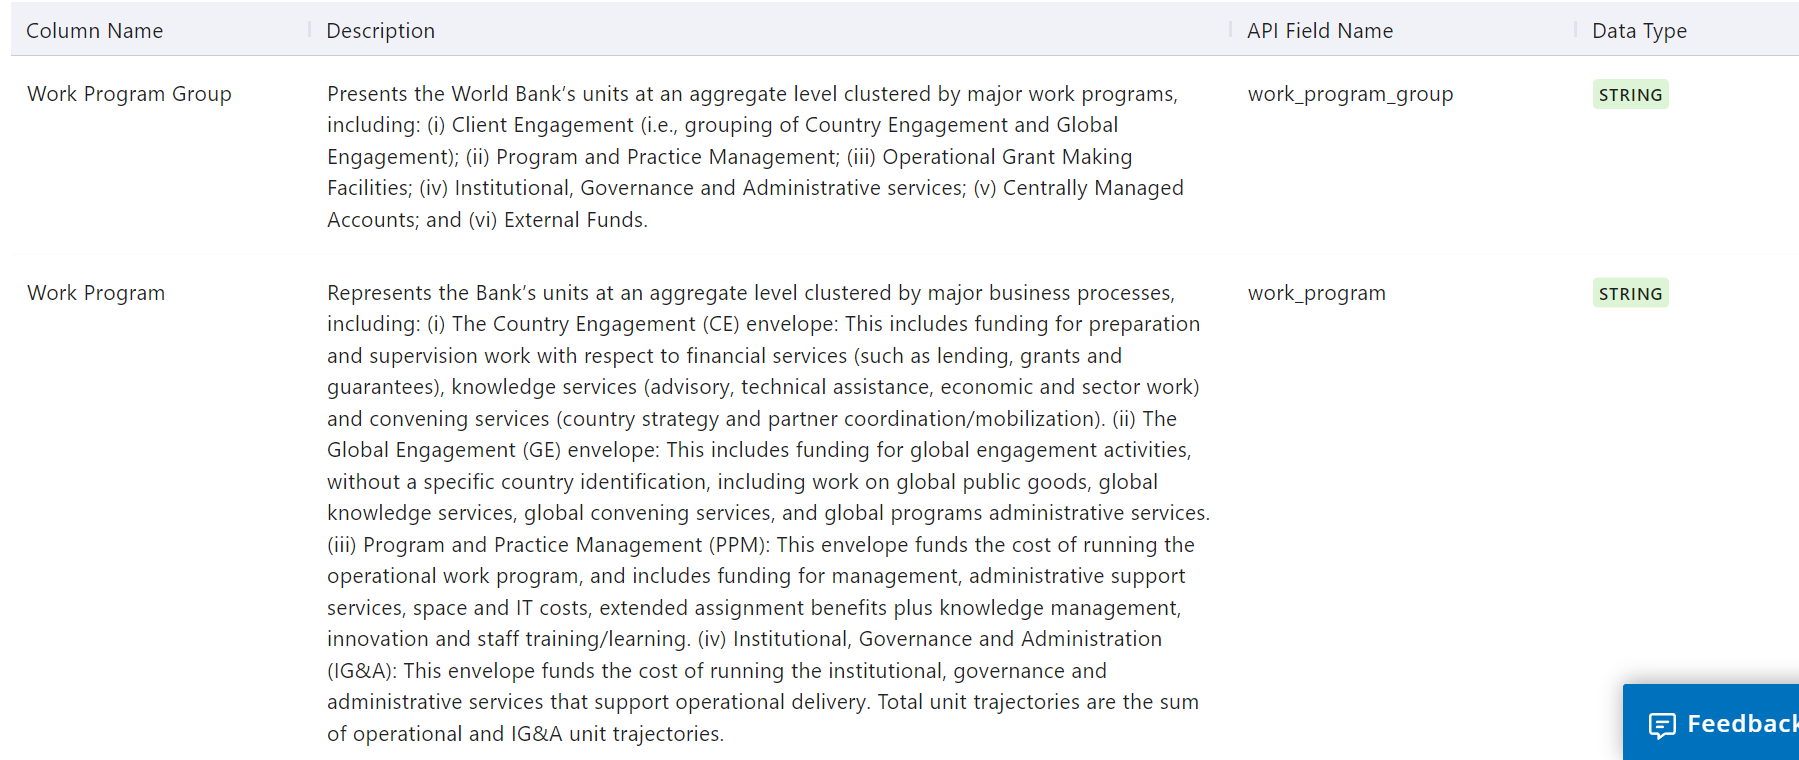
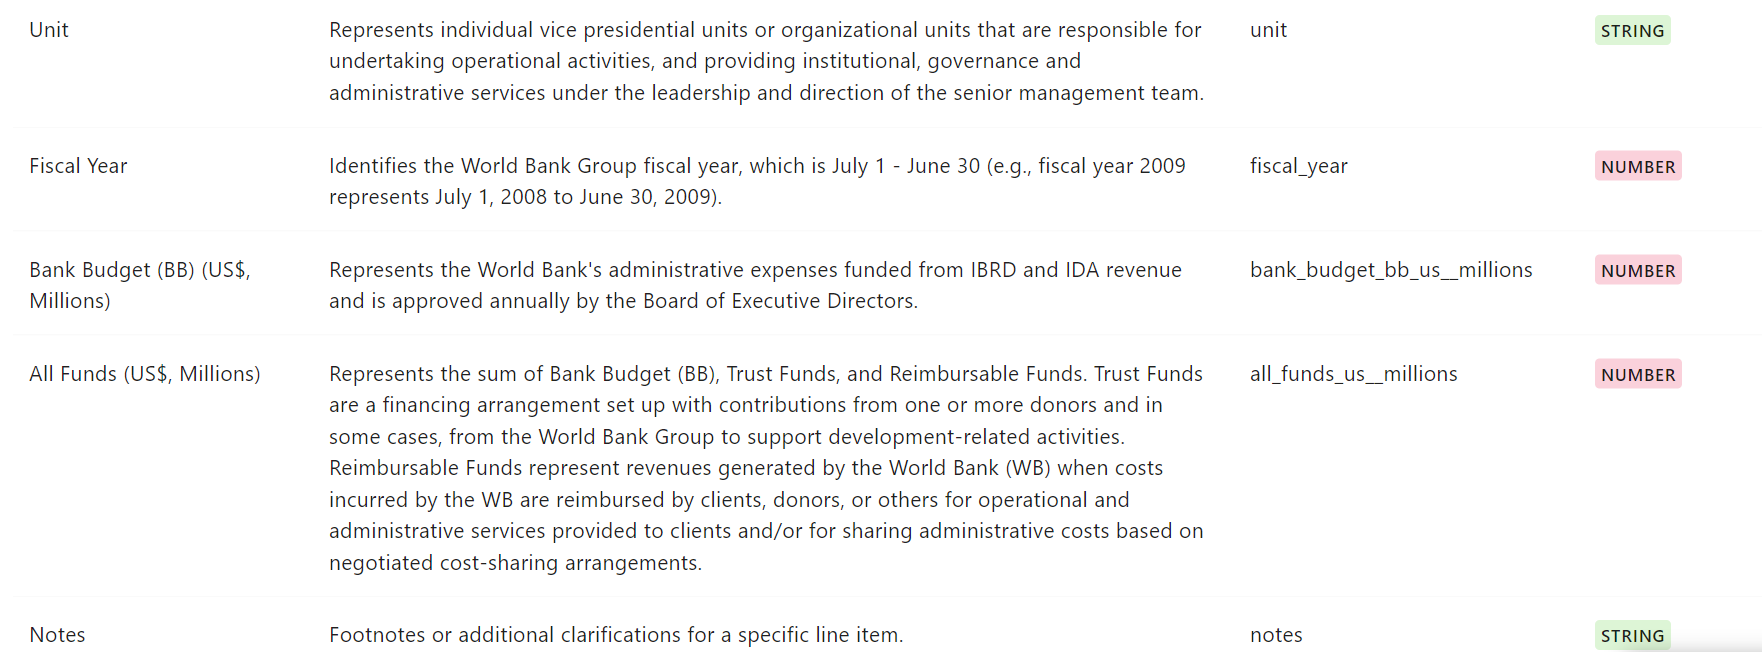







In [ ]:
import pandas as pd
import numpy as np

In [ ]:
WBP = pd.read_csv('World_Bank_Program_Budget_and_All_Funds.csv', delimiter = ",", header = 0)
WBP.head(5)

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",Notes
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,NaN
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,NaN
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,FY19 restated to reflect the new arrangements ...
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,NaN
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,NaN


In [ ]:
WBP.shape

(666, 7)

In [ ]:
WBP.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",8
"All Funds (US$, Millions)",8
Notes,435


In [ ]:
wbp_und = WBP.copy()
wbp_und = wbp_und.drop(columns=['Notes'])
wbp_und.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0


In [ ]:
wbp_und = wbp_und['Work Program Group'].unique()
wbp_und

array(['Institutional, Governance and Administrative Services',
       'Operational Grant Making Facilities',
       'Program and Practice Management', 'Client Engagement',
       'Centrally Managed Accounts & Miscellaneous Programs',
       'Funded by External Funds - All Funds'], dtype=object)

In [ ]:
wbp_und2 = WBP.copy()
wbp_und2 = wbp_und2[wbp_und2['Work Program Group'] == 'Funded by External Funds - All Funds'].sort_values('Fiscal Year', ascending=True)
wbp_und2.head(20)

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",Notes
318,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2015,-31.3,-1242.7,"For Bank Budget columns, this line only shows ..."
378,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2016,-163.8,-1338.7,"For Bank Budget columns, this line only shows ..."
441,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2017,-184.0,-1347.5,"For Bank Budget columns, this line only shows ..."
504,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2018,-195.7,-1496.0,"For Bank Budget columns, this line only shows ..."
513,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2019,-176.6,-1615.5,NaN
633,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2020,-188.0,-1795.3,NaN
92,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2021,-191.8,-1723.1,NaN
104,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2022,-197.6,-1720.0,NaN
177,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2023,-192.0,-1771.0,NaN
246,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2024,-190.0,-1821.0,NaN


In [ ]:
WBP_Rnotes = WBP.copy()
# Remove Notes Column karena banyak memiliki Nan Values
WBP_Rnotes = WBP_Rnotes.drop(columns=['Notes'])
WBP_Rnotes.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0


In [ ]:
# select the Nan values in the dataset
WBP_isna = WBP_Rnotes.copy()
WBP_isna[WBP_isna.isna().any(axis=1)]

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
22,Client Engagement,Country Engagement,Africa,2021,NaN,NaN
32,Program and Practice Management,Regions Program & Practice Management,Africa,2021,NaN,NaN
98,Client Engagement,Country Engagement,Africa,2022,NaN,NaN
148,Program and Practice Management,Regions Program & Practice Management,Africa,2022,NaN,NaN
171,Client Engagement,Country Engagement,Africa,2023,NaN,NaN
219,Program and Practice Management,Regions Program & Practice Management,Africa,2023,NaN,NaN
240,Client Engagement,Country Engagement,Africa,2024,NaN,NaN
294,Program and Practice Management,Regions Program & Practice Management,Africa,2024,NaN,NaN


In [ ]:
WBP.describe()

,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
count,666.000000,658.000000,658.000000
mean,2019.657658,41.574924,41.575380
std,2.878478,64.374441,223.481151
min,2015.000000,-197.600000,-1821.000000
25%,2017.000000,1.900000,2.200000
50%,2020.000000,21.650000,32.250000
75%,2022.000000,68.700000,88.950000
max,2024.000000,406.600000,586.100000


In [ ]:
# group by Work Program Group aggregated by sum the Bank Budget (BB) (US$, Millions)
WBP_BB = WBP_Rnotes.groupby('Work Program Group')[
    ['Bank Budget (BB) (US$, Millions)', 'All Funds (US$, Millions)']].sum().sort_values(by='Bank Budget (BB) (US$, Millions)', ascending=False)
WBP_BB

,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
Work Program Group,,
"Institutional, Governance and Administrative Services",11007.8,14162.7
Client Engagement,8906.6,18341.8
Program and Practice Management,6861.2,8223.4
Centrally Managed Accounts & Miscellaneous Programs,1824.4,2032.4
Operational Grant Making Facilities,467.1,467.1
Funded by External Funds - All Funds,-1710.8,-15870.8


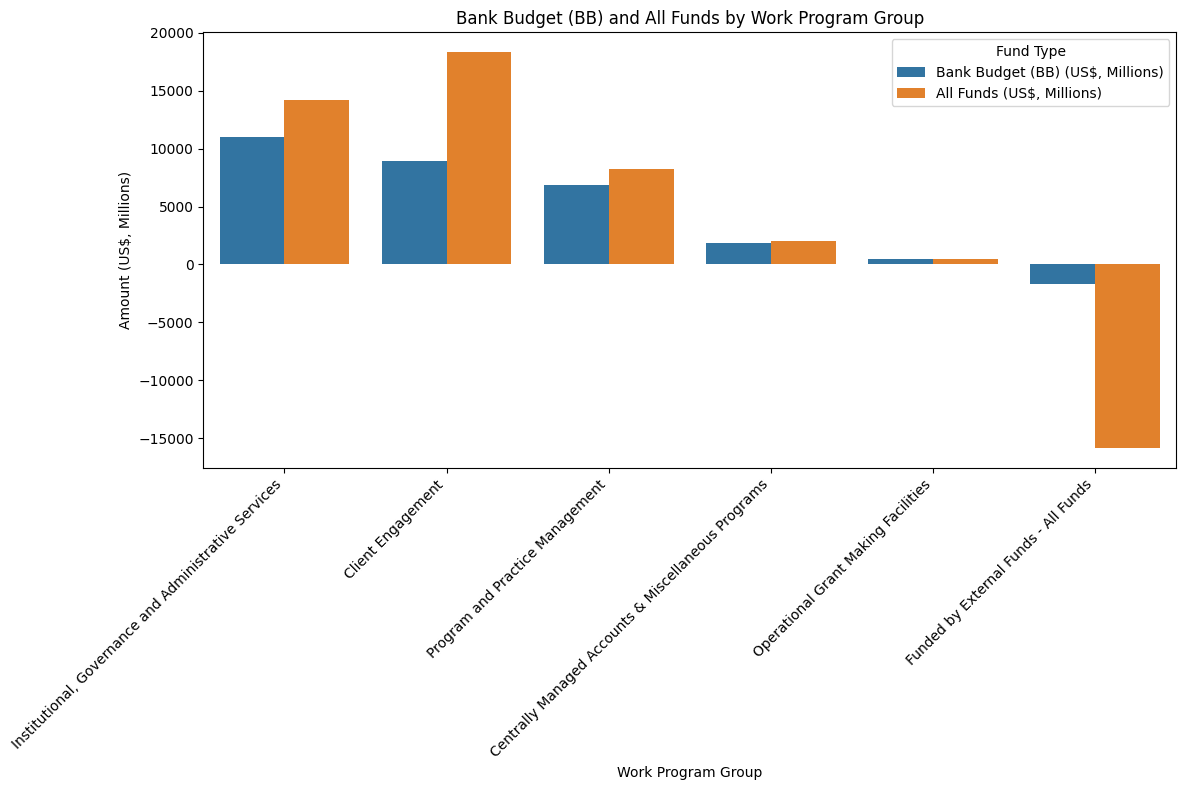

In [ ]:
# make a bar chart visualization for WBP_BB and use seaboard to see the difference bar at Bank Budget (BB) (US$, Millions) and All Funds (US$, Millions)

import matplotlib.pyplot as plt
import seaborn as sns

# Transpose the dataframe for better visualization
WBP_BB_T = WBP_BB.T

# Reset index to make 'Fund Type' a column
WBP_BB_T = WBP_BB_T.reset_index()

# Melt the dataframe to long format
WBP_BB_melted = pd.melt(WBP_BB_T, id_vars=['index'], var_name='Work Program Group', value_name='Amount (US$, Millions)')

# Rename the 'index' column to 'Fund Type'
WBP_BB_melted = WBP_BB_melted.rename(columns={'index': 'Fund Type'})

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Work Program Group', y='Amount (US$, Millions)', hue='Fund Type', data=WBP_BB_melted)
plt.xlabel("Work Program Group")
plt.ylabel("Amount (US$, Millions)")
plt.title("Bank Budget (BB) and All Funds by Work Program Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fund Type')
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'Work Program' which aggregated by Bank Budget (BB) (US$, Millions) and sorted from desc
WBP_WP = WBP_Rnotes.copy()
WBP_WP = WBP_WP.groupby('Work Program')['Bank Budget (BB) (US$, Millions)'].sum().sort_values(ascending=False)
WBP_WP.head(20)

,"Bank Budget (BB) (US$, Millions)"
Work Program,
Country Engagement,7969.0
Administrative Services,4609.0
Regions Program & Practice Management,4361.3
Institutional Services,4310.3
Governance Services,2088.5
Practice Groups Program & Practice Management,1973.2
Centrally Managed Accounts & Miscellaneous Programs,1824.4
Global Engagement,937.6
Other Operational Support Program & Practice Management,526.7


In [ ]:
WBP_WP2 = WBP_Rnotes.copy()
WBP_WP2 = WBP_WP2.groupby('Work Program')['All Funds (US$, Millions)'].sum().sort_values(ascending=False)
WBP_WP2.head(20)

,"All Funds (US$, Millions)"
Work Program,
Country Engagement,15410.9
Institutional Services,6027.4
Administrative Services,5853.1
Regions Program & Practice Management,4619.8
Global Engagement,2930.9
Practice Groups Program & Practice Management,2903.7
Governance Services,2282.2
Centrally Managed Accounts & Miscellaneous Programs,2032.4
Other Operational Support Program & Practice Management,699.9


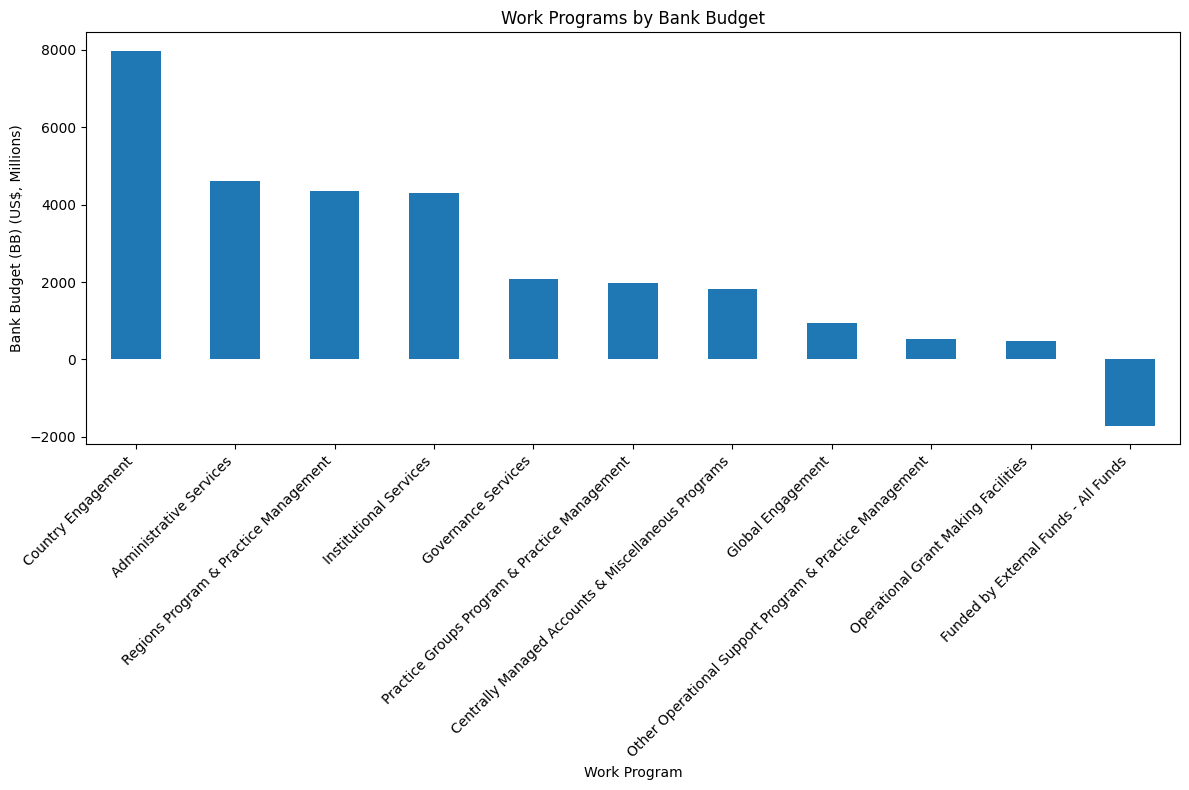

In [ ]:
# make a bar chart visualization from WBP_WP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
WBP_WP.plot(kind='bar')
plt.xlabel("Work Program")
plt.ylabel("Bank Budget (BB) (US$, Millions)")
plt.title("Work Programs by Bank Budget")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# GroupBY 'Unit'

In [ ]:
# select values from column 'Work Program Group' if values is 'Funded by External Funds - All Funds'
WBP_cek = WBP_Rnotes.copy()
WBP_cek = WBP_cek[WBP_cek['Work Program Group'] == 'Funded by External Funds - All Funds']
pd.set_option('display.max_rows', None)
WBP_cek.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
92,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2021,-191.8,-1723.1
104,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2022,-197.6,-1720.0
177,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2023,-192.0,-1771.0
246,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2024,-190.0,-1821.0
318,Funded by External Funds - All Funds,Funded by External Funds - All Funds,Funded by External Funds - All Funds,2015,-31.3,-1242.7


In [ ]:
# mau liat buat unit africa banyakan nilai Nan nya atau engga untuk Bank Budget and All Funds nya
WBP_cek_unit = WBP.copy()
WBP_cek_unit = WBP_cek_unit[WBP_cek_unit['Unit'] == 'Africa']
pd.set_option('display.max_columns', None)
WBP_cek_unit.head(40)

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",Notes
16,Program and Practice Management,Regions Program & Practice Management,Africa,2020,128.6,135.8,NaN
22,Client Engagement,Country Engagement,Africa,2021,NaN,NaN,Africa Country Engagement and Program and Prac...
32,Program and Practice Management,Regions Program & Practice Management,Africa,2021,NaN,NaN,Africa Country Engagement and Program and Prac...
98,Client Engagement,Country Engagement,Africa,2022,NaN,NaN,Africa Country Engagement and Program and Prac...
148,Program and Practice Management,Regions Program & Practice Management,Africa,2022,NaN,NaN,Africa Country Engagement and Program and Prac...
171,Client Engagement,Country Engagement,Africa,2023,NaN,NaN,Africa Country Engagement and Program and Prac...
219,Program and Practice Management,Regions Program & Practice Management,Africa,2023,NaN,NaN,Africa Country Engagement and Program and Prac...
240,Client Engagement,Country Engagement,Africa,2024,NaN,NaN,Africa Country Engagement and Program and Prac...
294,Program and Practice Management,Regions Program & Practice Management,Africa,2024,NaN,NaN,Africa Country Engagement and Program and Prac...
310,Client Engagement,Country Engagement,Africa,2015,167.8,355.5,NaN


In [ ]:
  WBP.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",8
"All Funds (US$, Millions)",8
Notes,435


In [ ]:
WBP_cek_unit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 16 to 624
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Work Program Group                20 non-null     object 
 1   Work Program                      20 non-null     object 
 2   Unit                              20 non-null     object 
 3   Fiscal Year                       20 non-null     int64  
 4   Bank Budget (BB) (US$, Millions)  12 non-null     float64
 5   All Funds (US$, Millions)         12 non-null     float64
 6   Notes                             10 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


In [ ]:
# fill the nan values in unit africa for column Bank Budget (BB) (US$, Millions) &	All Funds (US$, Millions) with average for each column
WBP_cek_unit.describe()

,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
count,20.000000,12.000000,12.000000
mean,2019.500000,179.800000,289.858333
std,2.946898,73.670075,183.439886
min,2015.000000,107.500000,110.600000
25%,2017.000000,122.025000,125.650000
50%,2019.500000,150.800000,247.800000
75%,2022.000000,221.675000,424.325000
max,2024.000000,317.000000,586.100000


### Exploratory Data Analysis

In [ ]:
wbp_pre1 = WBP_Rnotes.copy()
wbp_pre1.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0


In [ ]:
# Remove rows where 'Work Program Group' is 'Funded by External Funds - All Funds'
wbp_pre1 = wbp_pre1[wbp_pre1['Work Program Group'] != 'Funded by External Funds - All Funds']
print(wbp_pre1['Work Program Group'].unique())

['Institutional, Governance and Administrative Services'
 'Operational Grant Making Facilities' 'Program and Practice Management'
 'Client Engagement' 'Centrally Managed Accounts & Miscellaneous Programs']


In [ ]:
wbp_pre1.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",8
"All Funds (US$, Millions)",8


In [ ]:
# Change the Nan Value inside the column "Bank Budget (BB) (US$, Millions)" and ("All Funds (US$, Millions") with Median values from each column and show all table wbp_pre1

# Fill NaN values in 'Bank Budget (BB) (US$, Millions)' and 'All Funds (US$, Millions)' with the median of each column
wbp_pre1['Bank Budget (BB) (US$, Millions)'] = wbp_pre1['Bank Budget (BB) (US$, Millions)'].fillna(wbp_pre1['Bank Budget (BB) (US$, Millions)'].median())
wbp_pre1['All Funds (US$, Millions)'] = wbp_pre1['All Funds (US$, Millions)'].fillna(wbp_pre1['All Funds (US$, Millions)'].median())

# Show the updated table
wbp_pre1.head()


,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0


In [ ]:
wbp_cek_pre = wbp_pre1.copy()
wbp_cek_pre = wbp_cek_pre[wbp_cek_pre['Unit'] == 'Africa']
wbp_cek_pre.head(20)

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
16,Program and Practice Management,Regions Program & Practice Management,Africa,2020,128.60,135.8
22,Client Engagement,Country Engagement,Africa,2021,22.75,33.7
32,Program and Practice Management,Regions Program & Practice Management,Africa,2021,22.75,33.7
98,Client Engagement,Country Engagement,Africa,2022,22.75,33.7
148,Program and Practice Management,Regions Program & Practice Management,Africa,2022,22.75,33.7
171,Client Engagement,Country Engagement,Africa,2023,22.75,33.7
219,Program and Practice Management,Regions Program & Practice Management,Africa,2023,22.75,33.7
240,Client Engagement,Country Engagement,Africa,2024,22.75,33.7
294,Program and Practice Management,Regions Program & Practice Management,Africa,2024,22.75,33.7
310,Client Engagement,Country Engagement,Africa,2015,167.80,355.5


In [ ]:
wbp_pre1.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",0
"All Funds (US$, Millions)",0


In [ ]:
wbp_pre1.describe()

,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)"
count,656.000000,656.000000,656.000000
mean,2019.660061,44.587043,66.306402
std,2.878505,58.540853,91.403967
min,2015.000000,0.000000,0.000000
25%,2017.000000,2.000000,2.575000
50%,2020.000000,22.750000,33.700000
75%,2022.000000,69.450000,89.150000
max,2024.000000,406.600000,586.100000


In [ ]:
# Make a new column "External Budget" with calculation (All Funds (US$, Millions)-Bank Budget (BB) (US$, Millions) == External Budget )
wbp_pre1['External Budget'] = wbp_pre1['All Funds (US$, Millions)'] - wbp_pre1['Bank Budget (BB) (US$, Millions)']
wbp_pre1.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0


In [ ]:
wbp_pre1.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",0
"All Funds (US$, Millions)",0
External Budget,0


In [ ]:
# create new column "Percentage of External Budget" *external budget / bank budget * 100 == %
wbp_pre1['Percentage of External Budget'] = (wbp_pre1['External Budget'] / wbp_pre1['Bank Budget (BB) (US$, Millions)']) * 100
wbp_pre1.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5,0.904159
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3,30.841121
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4,20.000000
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0,0.000000


In [ ]:
# handle 0,00 values in percentage of external budget
wbp_pre1['Percentage of External Budget'] = wbp_pre1['Percentage of External Budget'].fillna(0)

In [ ]:
wbp_pre1.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",0
"All Funds (US$, Millions)",0
External Budget,0
Percentage of External Budget,0


In [ ]:
# create new column "Funding Source Evaluation" and the values is ideal or not ideal. if Precentage of External Budget >50% "Not Ideal" if <=50% "Ideal"
wbp_pre1['Funding Source Evaluation'] = np.where(wbp_pre1['Percentage of External Budget'] > 50, 'Not Ideal', 'Ideal')
wbp_pre1.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5,0.904159,Ideal
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3,30.841121,Ideal
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830,Not Ideal
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4,20.000000,Ideal
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0,0.000000,Ideal


In [ ]:
wbp_pre1.isna().sum()

,0
Work Program Group,0
Work Program,0
Unit,0
Fiscal Year,0
"Bank Budget (BB) (US$, Millions)",0
"All Funds (US$, Millions)",0
External Budget,0
Percentage of External Budget,0
Funding Source Evaluation,0


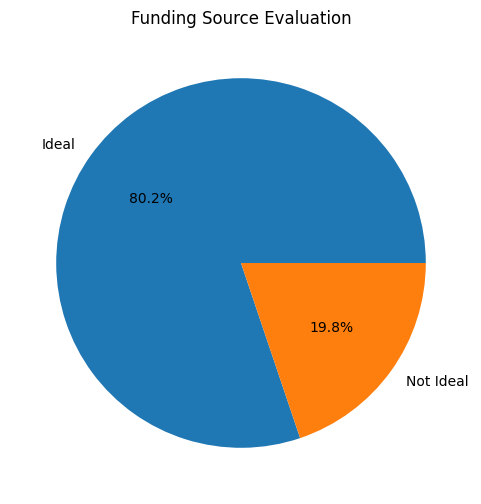

In [ ]:
# create visualization Funding Source Evaluation percentage from the dataset wbp_pre1 with pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wbp_pre1['Funding Source Evaluation'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Funding Source Evaluation')
plt.show()

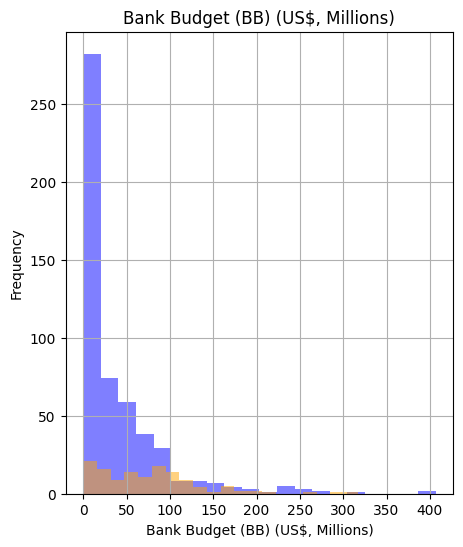

In [ ]:
# create a diagram distribution for "Bank Budget (BB) (US$, Millions) EDA Numerical
features = ['Bank Budget (BB) (US$, Millions)']
fig, ax = plt.subplots(figsize=(5, 6))
for feature in (features):
  wbp_pre1[wbp_pre1['Funding Source Evaluation'] == 'Ideal'][feature].hist(bins=20, color= 'blue', alpha = 0.5, ax=ax)
  wbp_pre1[wbp_pre1['Funding Source Evaluation'] == 'Not Ideal'][feature].hist(bins=20, color= 'orange', alpha = 0.5, ax=ax)
  ax.set_xlabel(feature)
  ax.set_ylabel('Frequency')
  ax.set_title(f'{feature}')
plt.show()

<ipython-input-40-ac4e89289bdd>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-ac4e89289bdd>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')


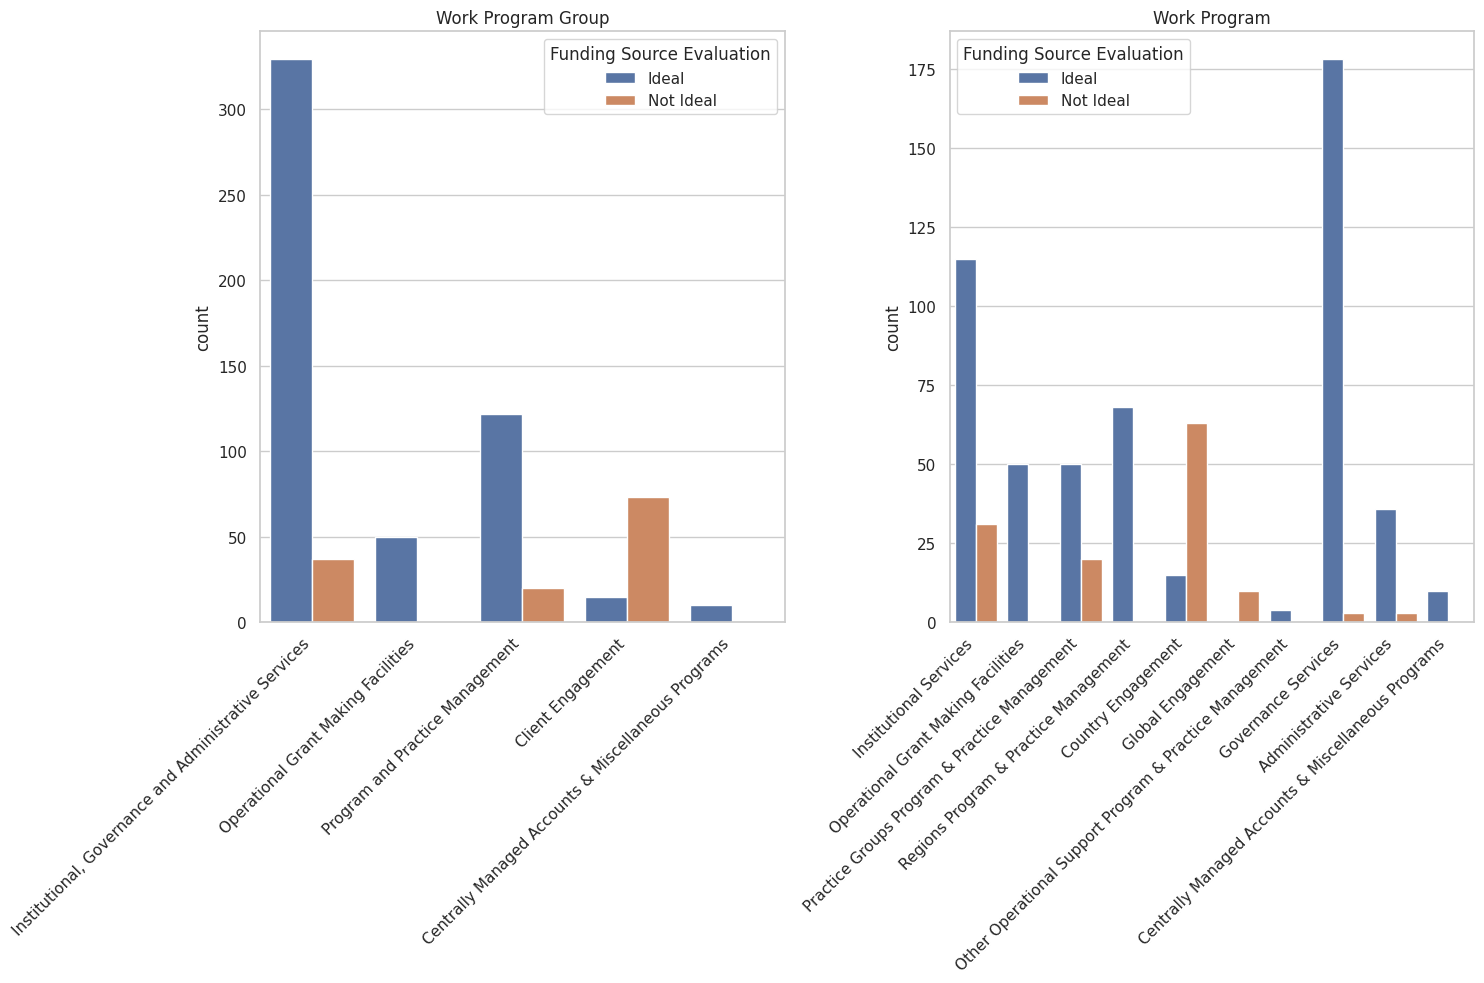

In [ ]:
# Bar plot to EDA categorical ('Work Program Group', 'Work Program')
sns.set(style= 'whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.countplot(x='Work Program Group', hue='Funding Source Evaluation', data=wbp_pre1, ax=ax[0])
sns.countplot(x='Work Program', hue='Funding Source Evaluation', data=wbp_pre1, ax=ax[1])
ax[0].set_title('Work Program Group')
ax[1].set_title('Work Program')
for a in ax:
  a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
  a.set_xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
wbp_insight = wbp_pre1.copy()
print(wbp_insight['Work Program Group'].unique())

['Institutional, Governance and Administrative Services'
 'Operational Grant Making Facilities' 'Program and Practice Management'
 'Client Engagement' 'Centrally Managed Accounts & Miscellaneous Programs']


In [ ]:
# Create a dictionary to map Work Program Group to abbreviations
work_program_abbreviations = {
    'Institutional, Governance and Administrative Services': 'IGAS',
    'Operational Grant Making Facilities': 'OGMF',
    'Program and Practice Management': 'PPM',
    'Client Engagement': 'CE',
    'Centrally Managed Accounts & Miscellaneous Programs': 'CMAMP'
}

# Add a new column 'Work Program Group Abbreviation' to the DataFrame
wbp_insight['Work Program Group Abbreviation'] = wbp_insight['Work Program Group'].map(work_program_abbreviations)

# Display the DataFrame with the new column
wbp_insight.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,Work Program Group Abbreviation
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5,0.904159,Ideal,IGAS
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3,30.841121,Ideal,IGAS
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830,Not Ideal,IGAS
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4,20.000000,Ideal,IGAS
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0,0.000000,Ideal,OGMF


In [ ]:
print(wbp_insight['Work Program'].unique())

['Institutional Services' 'Operational Grant Making Facilities'
 'Practice Groups Program & Practice Management'
 'Regions Program & Practice Management' 'Country Engagement'
 'Global Engagement'
 'Other Operational Support Program & Practice Management'
 'Governance Services' 'Administrative Services'
 'Centrally Managed Accounts & Miscellaneous Programs']


In [ ]:
# Create a dictionary to map Work Program to abbreviations
work_program_abbreviations = {
    'Institutional Services': 'IS',
    'Operational Grant Making Facilities': 'OGMF',
    'Practice Groups Program & Practice Management': 'PGPPM',
    'Regions Program & Practice Management': 'RPPM',
    'Country Engagement': 'CE',
    'Global Engagement' : 'GE',
    'Other Operational Support Program & Practice Management': 'OPSPPM',
    'Governance Services': 'GS',
    'Administrative Services': 'AS',
    'Centrally Managed Accounts & Miscellaneous Programs': 'CMAMP'
}

# Add a new column 'Work Program Group Abbreviation' to the DataFrame
wbp_insight['Work Program Abbreviation'] = wbp_insight['Work Program'].map(work_program_abbreviations)

# Display the DataFrame with the new column
wbp_insight.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,Work Program Group Abbreviation,Work Program Abbreviation
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5,0.904159,Ideal,IGAS,IS
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3,30.841121,Ideal,IGAS,IS
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830,Not Ideal,IGAS,IS
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4,20.000000,Ideal,IGAS,IS
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0,0.000000,Ideal,OGMF,OGMF


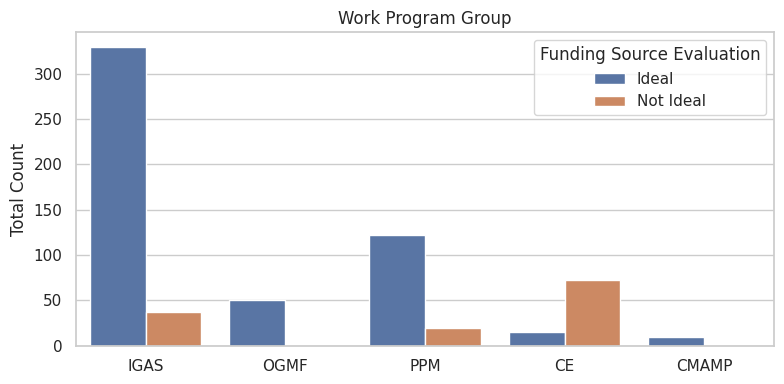

In [ ]:
# Bar Chart
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='Work Program Group Abbreviation', hue='Funding Source Evaluation', data=wbp_insight)
plt.title('Work Program Group')
plt.xlabel('')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

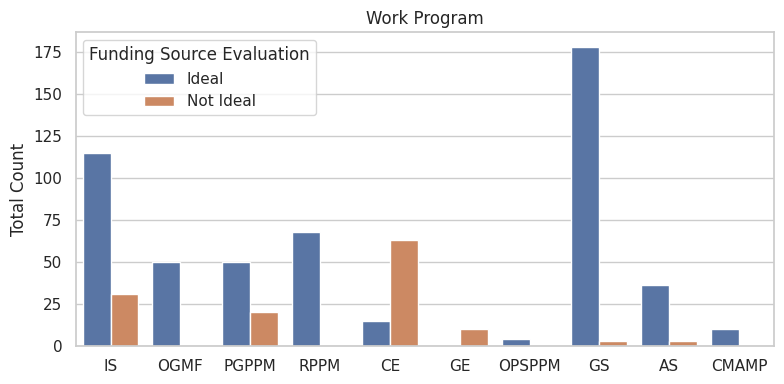

In [ ]:
# Bar Chart
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='Work Program Abbreviation', hue='Funding Source Evaluation', data=wbp_insight)
plt.title('Work Program')
plt.xlabel('')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

#### Recomendation : focus on how much external costs must be reduced in each work program group that still has less than ideal values so that it can become ideaL

In [ ]:
wbp_recom = wbp_insight.copy()
wbp_recom.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,Work Program Group Abbreviation,Work Program Abbreviation
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5,0.904159,Ideal,IGAS,IS
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3,30.841121,Ideal,IGAS,IS
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830,Not Ideal,IGAS,IS
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4,20.000000,Ideal,IGAS,IS
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0,0.000000,Ideal,OGMF,OGMF


In [ ]:
# Filter for 'Not Ideal' Funding Source Evaluation
wbp_not_ideal = wbp_recom[wbp_recom['Funding Source Evaluation'] == 'Not Ideal']
wbp_not_ideal.head(20)

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,Work Program Group Abbreviation,Work Program Abbreviation
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830,Not Ideal,IGAS,IS
12,Program and Practice Management,Practice Groups Program & Practice Management,Human Development,2020,43.6,98.7,55.1,126.376147,Not Ideal,PPM,PGPPM
15,Program and Practice Management,Practice Groups Program & Practice Management,Sustainable Development,2020,82.5,124.1,41.6,50.424242,Not Ideal,PPM,PGPPM
23,Client Engagement,Country Engagement,Africa East,2021,168.7,321.5,152.8,90.574985,Not Ideal,CE,CE
25,Client Engagement,Country Engagement,East Asia & Pacific,2021,120.6,254.9,134.3,111.359867,Not Ideal,CE,CE
26,Client Engagement,Country Engagement,Europe & Central Asia,2021,96.7,208.5,111.8,115.615305,Not Ideal,CE,CE
27,Client Engagement,Country Engagement,Latin America & Caribbean,2021,110.8,177.6,66.8,60.288809,Not Ideal,CE,CE
28,Client Engagement,Country Engagement,Middle East & North Africa,2021,72.1,171.0,98.9,137.170596,Not Ideal,CE,CE
29,Client Engagement,Country Engagement,Other Operational Units' Allocations,2021,12.3,89.6,77.3,628.455285,Not Ideal,CE,CE
30,Client Engagement,Country Engagement,South Asia,2021,147.8,239.4,91.6,61.975643,Not Ideal,CE,CE


In [ ]:
# Group by 'Work Program Group' and calculate the reduction needed in 'External Budget'
reduction_needed = wbp_not_ideal.groupby(['Work Program Group', 'Unit']).agg(
    {'External Budget': 'sum', 'Bank Budget (BB) (US$, Millions)': 'sum'}
)

In [ ]:
# Calculate the amount of reduction needed to reach the ideal state (External Budget <= 50% of Bank Budget)
reduction_needed['Reduction Needed'] = (
    reduction_needed['External Budget'] - (0.5 * reduction_needed['Bank Budget (BB) (US$, Millions)'])
)

In [ ]:
# Show Work Program Group == 'Client Engagement'
reduction_needed[reduction_needed.index.get_level_values('Work Program Group') == 'Client Engagement']

External Budget  \
Work Program Group Unit                                                    
Client Engagement  Africa                                         1295.1   
                   Africa East                                     603.4   
                   East Asia & Pacific                            1285.9   
                   Europe & Central Asia                          1012.7   
                   Global Engagement                              1993.3   
                   Latin America & Caribbean                       553.9   
                   Middle East & North Africa                      974.5   
                   Other Operational Units' Allocations            348.5   
                   South Asia                                      993.4   

                                                         Bank Budget (BB) (US$, Millions)  \
Work Program Group Unit                                                                     
Client Engagement  Africa                                                          1432.0   
                   Africa East                                                      743.4   
                   East Asia & Pacific                                             1085.9   
                   Europe & Central Asia                                            915.3   
                   Global Engagement                                                937.6   
                   Latin America & Caribbean                                        905.2   
                   Middle East & North Africa                                       649.3   
                   Other Operational Units' Allocations                              58.6   
                   South Asia                                                      1275.7   

                                                         Reduction Needed  
Work Program Group Unit                                                    
Client Engagement  Africa                                          579.10  
                   Africa East                                     231.70  
                   East Asia & Pacific                             742.95  
                   Europe & Central Asia                           555.05  
                   Global Engagement                              1524.50  
                   Latin America & Caribbean                       101.30  
                   Middle East & North Africa                      649.85  
                   Other Operational Units' Allocations            319.20  
                   South Asia                                      355.55

In [ ]:
# Show Work Program Group == 'Institutional, Governance and Administrative Services'
reduction_needed[reduction_needed.index.get_level_values('Work Program Group') == 'Institutional, Governance and Administrative Services']

External Budget  \
Work Program Group                                 Unit                                                                  
Institutional, Governance and Administrative Se... Development Economics                                         505.1   
                                                   Development Finance                                           174.2   
                                                   Global Environment Fund                                       317.2   
                                                   Internal Justice Services                                       2.6   
                                                   Office of the Managing Director, Development Po...              4.8   
                                                   People and Culture                                             96.0   
                                                   Treasury                                                      397.1   

                                                                                                       Bank Budget (BB) (US$, Millions)  \
Work Program Group                                 Unit                                                                                   
Institutional, Governance and Administrative Se... Development Economics                                                          565.0   
                                                   Development Finance                                                            109.6   
                                                   Global Environment Fund                                                          0.0   
                                                   Internal Justice Services                                                        4.3   
                                                   Office of the Managing Director, Development Po...                               7.8   
                                                   People and Culture                                                             179.3   
                                                   Treasury                                                                       238.5   

                                                                                                       Reduction Needed  
Work Program Group                                 Unit                                                                  
Institutional, Governance and Administrative Se... Development Economics                                         222.60  
                                                   Development Finance                                           119.40  
                                                   Global Environment Fund                                       317.20  
                                                   Internal Justice Services                                       0.45  
                                                   Office of the Managing Director, Development Po...              0.90  
                                                   People and Culture                                              6.35  
                                                   Treasury                                                      277.85

In [ ]:
# Show Work Program Group == 'Program and Practice Management'
reduction_needed[reduction_needed.index.get_level_values('Work Program Group') == 'Program and Practice Management']

External Budget  \
Work Program Group              Unit                                                          
Program and Practice Management Equitable Growth, Finance and Institutions             17.9   
                                Global Themes                                          90.5   
                                Human Development                                     109.0   
                                Infrastructure                                         62.4   
                                Sustainable Development                               426.9   

                                                                            Bank Budget (BB) (US$, Millions)  \
Work Program Group              Unit                                                                           
Program and Practice Management Equitable Growth, Finance and Institutions                              34.6   
                                Global Themes                                                           23.1   
                                Human Development                                                      107.7   
                                Infrastructure                                                          75.0   
                                Sustainable Development                                                402.7   

                                                                            Reduction Needed  
Work Program Group              Unit                                                          
Program and Practice Management Equitable Growth, Finance and Institutions              0.60  
                                Global Themes                                          78.95  
                                Human Development                                      55.15  
                                Infrastructure                                         24.90  
                                Sustainable Development                               225.55

In [ ]:
# Calculate the total reduction needed for each Work Program Groups
total_reduction_needed = reduction_needed['Reduction Needed'].sum()
print(f"Total Reduction Needed for all Work Program Groups: {total_reduction_needed}")

# Calculate the total reduction needed for each Work Program Group
total_reduction_by_group = reduction_needed.groupby('Work Program Group')['Reduction Needed'].sum()
print("\nTotal Reduction Needed by Work Program Group:")
print(total_reduction_by_group)

Total Reduction Needed for all Work Program Groups: 6389.099999999999

Total Reduction Needed by Work Program Group:
Work Program Group
Client Engagement                                        5059.20
Institutional, Governance and Administrative Services     944.75
Program and Practice Management                           385.15
Name: Reduction Needed, dtype: float64


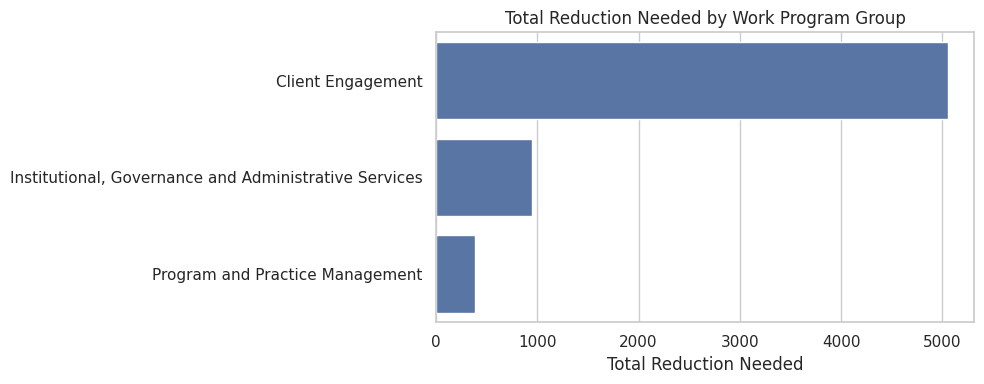

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a horizontal bar chart
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=total_reduction_by_group.values, y=total_reduction_by_group.index, orient='h')
plt.xlabel("Total Reduction Needed")
plt.ylabel('')
plt.title("Total Reduction Needed by Work Program Group")
plt.tight_layout()
plt.show()

In [ ]:
# download the wbp_insight to csv file
wbp_insight.to_csv('wbp_insight.csv', index=False)

### if remove outlier (EDA)

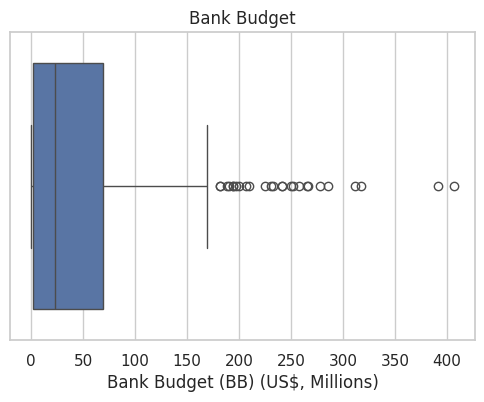

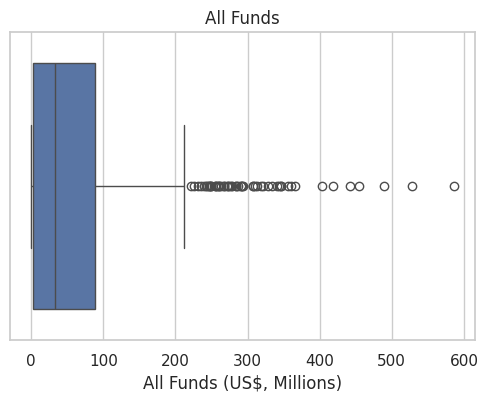

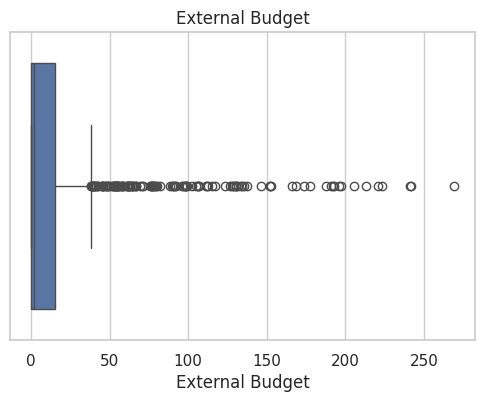

In [ ]:
# Outlier Check
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to identify outlier (Bank Budget)
plt.figure(figsize=(6, 4))
sns.boxplot(x=wbp_pre1['Bank Budget (BB) (US$, Millions)'])
plt.xlabel('Bank Budget (BB) (US$, Millions)')
plt.title('Bank Budget')
plt.show()

# All Funds
plt.figure(figsize=(6, 4))
sns.boxplot(x=wbp_pre1['All Funds (US$, Millions)'])
plt.xlabel('All Funds (US$, Millions)')
plt.title('All Funds')
plt.show()

# External Budget
plt.figure(figsize=(6, 4))
sns.boxplot(x=wbp_pre1['External Budget'])
plt.xlabel('External Budget')
plt.title('External Budget')
plt.show()

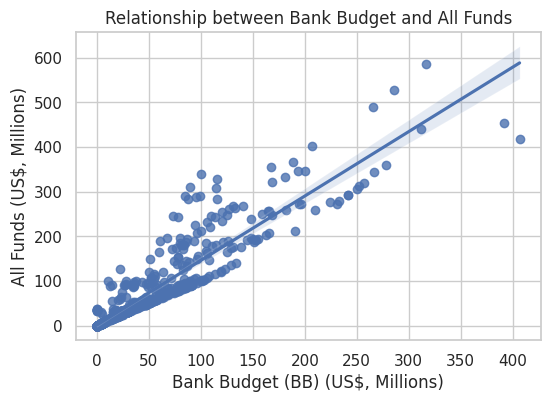

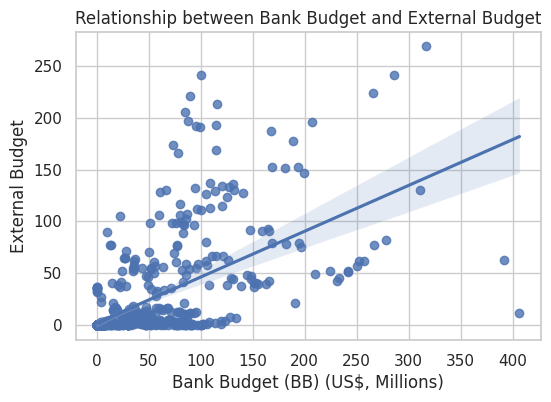

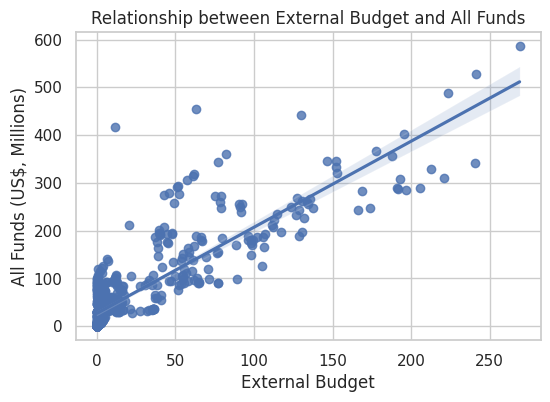

In [ ]:
# Outlier Check
# Create a scatter plot to visualize the relationship between two data
import matplotlib.pyplot as plt
import seaborn as sns

# 'Bank Budget (BB) (US$, Millions)' and 'All Funds (US$, Millions)'
plt.figure(figsize=(6,4))
sns.regplot(x='Bank Budget (BB) (US$, Millions)', y='All Funds (US$, Millions)', data=wbp_pre1)
plt.xlabel('Bank Budget (BB) (US$, Millions)')
plt.ylabel('All Funds (US$, Millions)')
plt.title('Relationship between Bank Budget and All Funds')
plt.show()

# 'Bank Budget (BB) (US$, Millions)' and 'External Budget'
plt.figure(figsize=(6,4))
sns.regplot(x='Bank Budget (BB) (US$, Millions)', y='External Budget', data=wbp_pre1)
plt.xlabel('Bank Budget (BB) (US$, Millions)')
plt.ylabel('External Budget')
plt.title('Relationship between Bank Budget and External Budget')
plt.show()

# 'External Budget' and 'All Funds (US$, Millions)'
plt.figure(figsize=(6,4))
sns.regplot(x='External Budget', y='All Funds (US$, Millions)', data=wbp_pre1)
plt.xlabel('External Budget')
plt.ylabel('All Funds (US$, Millions)')
plt.title('Relationship between External Budget and All Funds')
plt.show()

In [ ]:
# Create Interquartile Range Method for outlier
# Try to remove the outlier

import numpy as np
def detect_outliers_iqr(data):

  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

# Detect outliers in 'Bank Budget (BB) (US$, Millions)'
bank_budget_outliers = detect_outliers_iqr(wbp_pre1['Bank Budget (BB) (US$, Millions)'])
print("Outliers in Bank Budget:", bank_budget_outliers)

# Detect outliers in 'All Funds (US$, Millions)'
all_funds_outliers = detect_outliers_iqr(wbp_pre1['All Funds (US$, Millions)'])
print("Outliers in All Funds:", all_funds_outliers)

# Detect outliers in 'External Budget'
external_budget_outliers = detect_outliers_iqr(wbp_pre1['External Budget'])
print("Outliers in External Budget:", external_budget_outliers)

Outliers in Bank Budget: [252.0, 181.3, 181.9, 257.4, 193.7, 194.2, 266.4, 199.7, 196.7, 278.0, 311.3, 230.9, 190.5, 188.5, 391.7, 232.8, 209.9, 207.0, 406.6, 224.6, 265.7, 241.4, 286.0, 241.3, 317.0, 249.9]
Outliers in All Funds: [321.5, 247.3, 254.9, 239.4, 287.5, 313.5, 249.8, 333.3, 260.1, 260.6, 290.4, 319.1, 256.9, 345.9, 273.5, 267.1, 221.6, 307.5, 343.3, 256.2, 346.1, 272.2, 262.7, 242.9, 328.5, 360.1, 441.5, 355.5, 290.4, 273.7, 366.1, 454.7, 244.0, 278.6, 258.9, 402.7, 417.9, 246.8, 277.1, 489.2, 232.0, 234.9, 284.7, 293.2, 527.5, 292.2, 246.6, 249.0, 310.3, 586.1, 283.8, 226.0, 267.9, 340.8, 307.1]
Outliers in External Budget: [52.5, 55.1, 41.599999999999994, 152.8, 78.70000000000002, 134.3, 111.8, 66.8, 98.9, 77.3, 91.6, 192.0, 64.8, 38.900000000000006, 60.800000000000004, 55.2, 44.79999999999998, 61.5, 66.5, 98.39999999999999, 91.10000000000002, 76.9, 152.0, 78.20000000000002, 133.60000000000002, 111.30000000000001, 190.99999999999997, 56.6, 57.900000000000006, 61.70000000

In [ ]:
# check number rows of data from wbp_pre1
print("Number of rows in wbp_pre1:", len(wbp_pre1))

Number of rows in wbp_pre1: 656


In [ ]:
# delete the outlier

wbp_pre2 = wbp_pre1.copy()

# Remove outliers using IQR method for 'Bank Budget (BB) (US$, Millions)'
Q1_bank_budget = wbp_pre2['Bank Budget (BB) (US$, Millions)'].quantile(0.25)
Q3_bank_budget = wbp_pre2['Bank Budget (BB) (US$, Millions)'].quantile(0.75)
IQR_bank_budget = Q3_bank_budget - Q1_bank_budget
lower_bound_bank_budget = Q1_bank_budget - 1.5 * IQR_bank_budget
upper_bound_bank_budget = Q3_bank_budget + 1.5 * IQR_bank_budget
wbp_no_outliers = wbp_pre2[
    (wbp_pre2['Bank Budget (BB) (US$, Millions)'] >= lower_bound_bank_budget) &
    (wbp_pre2['Bank Budget (BB) (US$, Millions)'] <= upper_bound_bank_budget)
]

# Remove outliers using IQR method for 'All Funds (US$, Millions)'
Q1_all_funds = wbp_no_outliers['All Funds (US$, Millions)'].quantile(0.25)
Q3_all_funds = wbp_no_outliers['All Funds (US$, Millions)'].quantile(0.75)
IQR_all_funds = Q3_all_funds - Q1_all_funds
lower_bound_all_funds = Q1_all_funds - 1.5 * IQR_all_funds
upper_bound_all_funds = Q3_all_funds + 1.5 * IQR_all_funds
wbp_no_outliers = wbp_no_outliers[
    (wbp_no_outliers['All Funds (US$, Millions)'] >= lower_bound_all_funds) &
    (wbp_no_outliers['All Funds (US$, Millions)'] <= upper_bound_all_funds)
]


# Remove outliers using IQR method for 'External Budget'
Q1_external_budget = wbp_no_outliers['External Budget'].quantile(0.25)
Q3_external_budget = wbp_no_outliers['External Budget'].quantile(0.75)
IQR_external_budget = Q3_external_budget - Q1_external_budget
lower_bound_external_budget = Q1_external_budget - 1.5 * IQR_external_budget
upper_bound_external_budget = Q3_external_budget + 1.5 * IQR_external_budget
wbp_no_outliers = wbp_no_outliers[
    (wbp_no_outliers['External Budget'] >= lower_bound_external_budget) &
    (wbp_no_outliers['External Budget'] <= upper_bound_external_budget)
]

print("Number of rows after removing outliers:", len(wbp_no_outliers))


Number of rows after removing outliers: 503


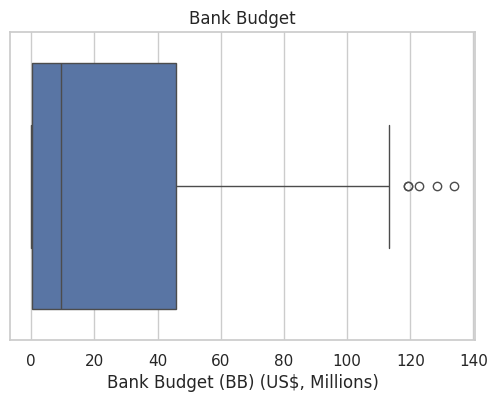

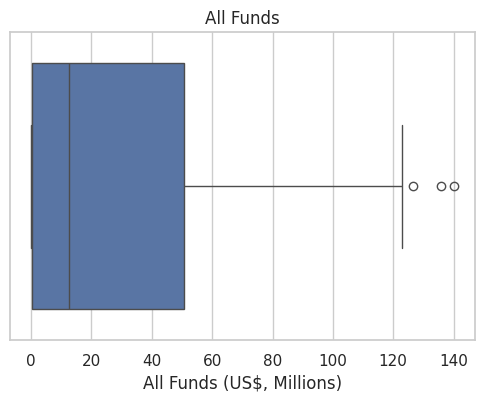

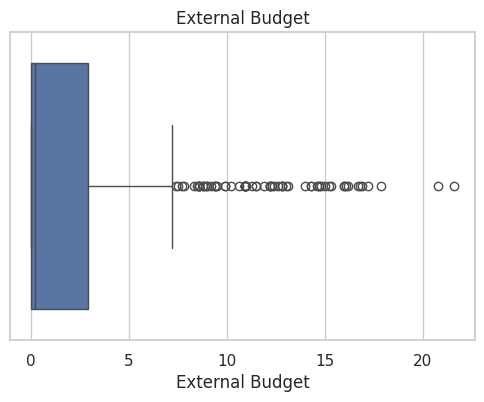

In [ ]:
# Outlier Check
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to identify outlier (Bank Budget)
plt.figure(figsize=(6, 4))
sns.boxplot(x=wbp_no_outliers['Bank Budget (BB) (US$, Millions)'])
plt.xlabel('Bank Budget (BB) (US$, Millions)')
plt.title('Bank Budget')
plt.show()

# All Funds
plt.figure(figsize=(6, 4))
sns.boxplot(x=wbp_no_outliers['All Funds (US$, Millions)'])
plt.xlabel('All Funds (US$, Millions)')
plt.title('All Funds')
plt.show()

# External Budget
plt.figure(figsize=(6, 4))
sns.boxplot(x=wbp_no_outliers['External Budget'])
plt.xlabel('External Budget')
plt.title('External Budget')
plt.show()

#**Modeling**

## Preprocessing

In [ ]:
wbp_pro1 = wbp_pre1.copy()
wbp_pro1.head()

,Work Program Group,Work Program,Unit,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation
0,"Institutional, Governance and Administrative S...",Institutional Services,Operational Policy & Country Services,2020,55.3,55.8,0.5,0.904159,Ideal
1,"Institutional, Governance and Administrative S...",Institutional Services,"Strategy, Performance, and Adminstration",2020,10.7,14.0,3.3,30.841121,Ideal
2,"Institutional, Governance and Administrative S...",Institutional Services,Treasury,2020,34.7,87.2,52.5,151.296830,Not Ideal
3,"Institutional, Governance and Administrative S...",Institutional Services,WBG Finance & Accounting,2020,47.0,56.4,9.4,20.000000,Ideal
4,Operational Grant Making Facilities,Operational Grant Making Facilities,Consultative Group for International Agricultu...,2020,30.0,30.0,0.0,0.000000,Ideal


In [ ]:
from google.colab import files

# Assuming 'wbp_pro1' is your DataFrame

# Convert the DataFrame to a CSV file
wbp_pro1.to_csv('WBP Budget Analysis.csv', index=False)

# Download the CSV file
files.download('WBP Budget Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
wbp_pro1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 665
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Work Program Group                656 non-null    object 
 1   Work Program                      656 non-null    object 
 2   Unit                              656 non-null    object 
 3   Fiscal Year                       656 non-null    int64  
 4   Bank Budget (BB) (US$, Millions)  656 non-null    float64
 5   All Funds (US$, Millions)         656 non-null    float64
 6   External Budget                   656 non-null    float64
 7   Percentage of External Budget     656 non-null    float64
 8   Funding Source Evaluation         656 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 51.2+ KB


In [ ]:
wbp_clean = wbp_pro1.copy()
# Label one hot encoding for dataset wbp_clean_test
wbp_clean = pd.get_dummies(wbp_clean, columns=['Work Program Group', 'Work Program', 'Unit'], prefix=['WPG', 'WP', 'Unit'])
wbp_clean.head()

,Fiscal Year,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,WPG_Centrally Managed Accounts & Miscellaneous Programs,WPG_Client Engagement,"WPG_Institutional, Governance and Administrative Services",WPG_Operational Grant Making Facilities,WPG_Program and Practice Management,WP_Administrative Services,WP_Centrally Managed Accounts & Miscellaneous Programs,WP_Country Engagement,WP_Global Engagement,WP_Governance Services,WP_Institutional Services,WP_Operational Grant Making Facilities,WP_Other Operational Support Program & Practice Management,WP_Practice Groups Program & Practice Management,WP_Regions Program & Practice Management,Unit_Accountability Mechanism,Unit_Administrative Tribunal,Unit_Africa,Unit_Africa East,Unit_Africa West,Unit_Board,"Unit_Budget, Performance & Strategy",Unit_CMP-Data Privacy Office,Unit_Centrally Managed Accounts & Miscellaneous Programs,Unit_Chief Risk Office,Unit_Consultative Group for International Agricultural Research,Unit_Corporate Secretariat,Unit_Development Economics,Unit_Development Finance,Unit_Development Grant Facility,Unit_East Asia & Pacific,"Unit_Equitable Growth, Finance and Institutions",Unit_Ethics and Internal Justice Services,Unit_Europe & Central Asia,Unit_External & Corporate Relations,Unit_Financing for Development,Unit_Global Corporate Solutions,Unit_Global Engagement,Unit_Global Environment Fund,Unit_Global Partnership for Social Accountability,Unit_Global Practice,Unit_Global Themes,Unit_Group Internal Audit,Unit_Health and Safety Directorate,Unit_Human Development,Unit_Independent Evaluation Group,Unit_Information & Technology Solutions,Unit_Infrastructure,Unit_Institutional Development Fund,Unit_Integrity Vice Presidency,Unit_Internal Justice Services,Unit_International Centre for Settlement of Investment Disputes,Unit_Latin America & Caribbean,"Unit_Leadership, Learning & Innovation",Unit_Legal Services,Unit_Managing Directors,Unit_Middle East & North Africa,Unit_Office of Ethics and Business Conduct,Unit_Office of Senior Vice President Mahmoud Mohieldin,Unit_Office of Suspension & Debarment,Unit_Office of the Managing Director and WBG Chief Administrative Officer,Unit_Office of the Managing Director and WBG Chief Financial Officer,"Unit_Office of the Managing Director, Development Policy And Partnerships","Unit_Office of the Managing Director, Operations",Unit_Office of the President,"Unit_Office of the Senior Managing Director, Development Policy And Partnerships",Unit_Operational Policy & Country Services,Unit_Other Operational Support,Unit_Other Operational Support Program & Practice Management,Unit_Other Operational Units' Allocations,Unit_People and Culture,Unit_Sanctions Board,Unit_South Asia,Unit_State and Peace Building Fund,Unit_Strategic Initiatives Unit,"Unit_Strategy, Performance, and Adminstration",Unit_Sustainable Development,Unit_Treasury,Unit_WBG Finance & Accounting
0,2020,55.3,55.8,0.5,0.904159,Ideal,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2020,10.7,14.0,3.3,30.841121,Ideal,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2020

In [ ]:
# Drop Fiscal Year
wbp_clean = wbp_clean.drop(columns=['Fiscal Year'])
wbp_clean.head()

,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,WPG_Centrally Managed Accounts & Miscellaneous Programs,WPG_Client Engagement,"WPG_Institutional, Governance and Administrative Services",WPG_Operational Grant Making Facilities,WPG_Program and Practice Management,WP_Administrative Services,WP_Centrally Managed Accounts & Miscellaneous Programs,WP_Country Engagement,WP_Global Engagement,WP_Governance Services,WP_Institutional Services,WP_Operational Grant Making Facilities,WP_Other Operational Support Program & Practice Management,WP_Practice Groups Program & Practice Management,WP_Regions Program & Practice Management,Unit_Accountability Mechanism,Unit_Administrative Tribunal,Unit_Africa,Unit_Africa East,Unit_Africa West,Unit_Board,"Unit_Budget, Performance & Strategy",Unit_CMP-Data Privacy Office,Unit_Centrally Managed Accounts & Miscellaneous Programs,Unit_Chief Risk Office,Unit_Consultative Group for International Agricultural Research,Unit_Corporate Secretariat,Unit_Development Economics,Unit_Development Finance,Unit_Development Grant Facility,Unit_East Asia & Pacific,"Unit_Equitable Growth, Finance and Institutions",Unit_Ethics and Internal Justice Services,Unit_Europe & Central Asia,Unit_External & Corporate Relations,Unit_Financing for Development,Unit_Global Corporate Solutions,Unit_Global Engagement,Unit_Global Environment Fund,Unit_Global Partnership for Social Accountability,Unit_Global Practice,Unit_Global Themes,Unit_Group Internal Audit,Unit_Health and Safety Directorate,Unit_Human Development,Unit_Independent Evaluation Group,Unit_Information & Technology Solutions,Unit_Infrastructure,Unit_Institutional Development Fund,Unit_Integrity Vice Presidency,Unit_Internal Justice Services,Unit_International Centre for Settlement of Investment Disputes,Unit_Latin America & Caribbean,"Unit_Leadership, Learning & Innovation",Unit_Legal Services,Unit_Managing Directors,Unit_Middle East & North Africa,Unit_Office of Ethics and Business Conduct,Unit_Office of Senior Vice President Mahmoud Mohieldin,Unit_Office of Suspension & Debarment,Unit_Office of the Managing Director and WBG Chief Administrative Officer,Unit_Office of the Managing Director and WBG Chief Financial Officer,"Unit_Office of the Managing Director, Development Policy And Partnerships","Unit_Office of the Managing Director, Operations",Unit_Office of the President,"Unit_Office of the Senior Managing Director, Development Policy And Partnerships",Unit_Operational Policy & Country Services,Unit_Other Operational Support,Unit_Other Operational Support Program & Practice Management,Unit_Other Operational Units' Allocations,Unit_People and Culture,Unit_Sanctions Board,Unit_South Asia,Unit_State and Peace Building Fund,Unit_Strategic Initiatives Unit,"Unit_Strategy, Performance, and Adminstration",Unit_Sustainable Development,Unit_Treasury,Unit_WBG Finance & Accounting
0,55.3,55.8,0.5,0.904159,Ideal,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,10.7,14.0,3.3,30.841121,Ideal,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,34.7,87.2,52.5,151.296830,

In [ ]:
wbp_clean.isna().sum()

,0
"Bank Budget (BB) (US$, Millions)",0
"All Funds (US$, Millions)",0
External Budget,0
Percentage of External Budget,0
Funding Source Evaluation,0
WPG_Centrally Managed Accounts & Miscellaneous Programs,0
WPG_Client Engagement,0
"WPG_Institutional, Governance and Administrative Services",0
WPG_Operational Grant Making Facilities,0
WPG_Program and Practice Management,0


In [ ]:
# Label Encoding Data
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

for column in wbp_clean.columns:
  if wbp_clean[column].dtype == np.number:
    continue
  wbp_clean[column] = LabelEncoder().fit_transform(wbp_clean[column])
wbp_clean.head()

,"Bank Budget (BB) (US$, Millions)","All Funds (US$, Millions)",External Budget,Percentage of External Budget,Funding Source Evaluation,WPG_Centrally Managed Accounts & Miscellaneous Programs,WPG_Client Engagement,"WPG_Institutional, Governance and Administrative Services",WPG_Operational Grant Making Facilities,WPG_Program and Practice Management,WP_Administrative Services,WP_Centrally Managed Accounts & Miscellaneous Programs,WP_Country Engagement,WP_Global Engagement,WP_Governance Services,WP_Institutional Services,WP_Operational Grant Making Facilities,WP_Other Operational Support Program & Practice Management,WP_Practice Groups Program & Practice Management,WP_Regions Program & Practice Management,Unit_Accountability Mechanism,Unit_Administrative Tribunal,Unit_Africa,Unit_Africa East,Unit_Africa West,Unit_Board,"Unit_Budget, Performance & Strategy",Unit_CMP-Data Privacy Office,Unit_Centrally Managed Accounts & Miscellaneous Programs,Unit_Chief Risk Office,Unit_Consultative Group for International Agricultural Research,Unit_Corporate Secretariat,Unit_Development Economics,Unit_Development Finance,Unit_Development Grant Facility,Unit_East Asia & Pacific,"Unit_Equitable Growth, Finance and Institutions",Unit_Ethics and Internal Justice Services,Unit_Europe & Central Asia,Unit_External & Corporate Relations,Unit_Financing for Development,Unit_Global Corporate Solutions,Unit_Global Engagement,Unit_Global Environment Fund,Unit_Global Partnership for Social Accountability,Unit_Global Practice,Unit_Global Themes,Unit_Group Internal Audit,Unit_Health and Safety Directorate,Unit_Human Development,Unit_Independent Evaluation Group,Unit_Information & Technology Solutions,Unit_Infrastructure,Unit_Institutional Development Fund,Unit_Integrity Vice Presidency,Unit_Internal Justice Services,Unit_International Centre for Settlement of Investment Disputes,Unit_Latin America & Caribbean,"Unit_Leadership, Learning & Innovation",Unit_Legal Services,Unit_Managing Directors,Unit_Middle East & North Africa,Unit_Office of Ethics and Business Conduct,Unit_Office of Senior Vice President Mahmoud Mohieldin,Unit_Office of Suspension & Debarment,Unit_Office of the Managing Director and WBG Chief Administrative Officer,Unit_Office of the Managing Director and WBG Chief Financial Officer,"Unit_Office of the Managing Director, Development Policy And Partnerships","Unit_Office of the Managing Director, Operations",Unit_Office of the President,"Unit_Office of the Senior Managing Director, Development Policy And Partnerships",Unit_Operational Policy & Country Services,Unit_Other Operational Support,Unit_Other Operational Support Program & Practice Management,Unit_Other Operational Units' Allocations,Unit_People and Culture,Unit_Sanctions Board,Unit_South Asia,Unit_State and Peace Building Fund,Unit_Strategic Initiatives Unit,"Unit_Strategy, Performance, and Adminstration",Unit_Sustainable Development,Unit_Treasury,Unit_WBG Finance & Accounting
0,55.3,55.8,0.5,0.904159,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,10.7,14.0,3.3,30.841121,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,34.7,87.2,52.5,151.296830,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,47.0,56.4,9.4,20.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30.0,30.0,0.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wbp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 665
Data columns (total 84 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Bank Budget (BB) (US$, Millions)                                                  656 non-null    float64
 1   All Funds (US$, Millions)                                                         656 non-null    float64
 2   External Budget                                                                   656 non-null    float64
 3   Percentage of External Budget                                                     656 non-null    float64
 4   Funding Source Evaluation                                                         656 non-null    int64  
 5   WPG_Centrally Managed Accounts & Miscellaneous Programs                           656 non-null    int64  
 6   WPG_Cli

In [ ]:
# Round up and convert to integers for specified columns:
columns_to_round = ['Bank Budget (BB) (US$, Millions)', 'All Funds (US$, Millions)',
                   'External Budget', 'Percentage of External Budget']
for column in columns_to_round:
    wbp_clean[column] = wbp_clean[column].replace([np.inf, -np.inf], np.nan)
    wbp_clean[column] = wbp_clean[column].fillna(0)
    wbp_clean[column] = np.ceil(wbp_clean[column]).astype(int)
wbp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 665
Data columns (total 84 columns):
 #   Column                                                                            Non-Null Count  Dtype
---  ------                                                                            --------------  -----
 0   Bank Budget (BB) (US$, Millions)                                                  656 non-null    int64
 1   All Funds (US$, Millions)                                                         656 non-null    int64
 2   External Budget                                                                   656 non-null    int64
 3   Percentage of External Budget                                                     656 non-null    int64
 4   Funding Source Evaluation                                                         656 non-null    int64
 5   WPG_Centrally Managed Accounts & Miscellaneous Programs                           656 non-null    int64
 6   WPG_Client Engagement  

In [ ]:
wbp_clean.isna().sum()

,0
"Bank Budget (BB) (US$, Millions)",0
"All Funds (US$, Millions)",0
External Budget,0
Percentage of External Budget,0
Funding Source Evaluation,0
WPG_Centrally Managed Accounts & Miscellaneous Programs,0
WPG_Client Engagement,0
"WPG_Institutional, Governance and Administrative Services",0
WPG_Operational Grant Making Facilities,0
WPG_Program and Practice Management,0


In [ ]:
# Splitting Data
from sklearn.model_selection import train_test_split
X = wbp_clean.drop('Funding Source Evaluation', axis=1)
y = wbp_clean['Funding Source Evaluation']

# make a train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# description
print('total rows and column x_train= ', x_train.shape, ', and total rows and column y_train= ', y_train.shape)
print('percentage ideal and not ideal=')
print(y_train.value_counts(normalize=True))
print('total rows and column x_test= ', x_test.shape, ', and total rows and column y_test= ', y_test.shape)
print('percentage ideal and not ideal=')
print(y_test.value_counts(normalize=True))

total rows and column x_train=  (459, 83) , and total rows and column y_train=  (459,)
percentage ideal and not ideal=
Funding Source Evaluation
0    0.801743
1    0.198257
Name: proportion, dtype: float64
total rows and column x_test=  (197, 83) , and total rows and column y_test=  (197,)
percentage ideal and not ideal=
Funding Source Evaluation
0    0.80203
1    0.19797
Name: proportion, dtype: float64


## Model Machine Learning


### Logistic Regression
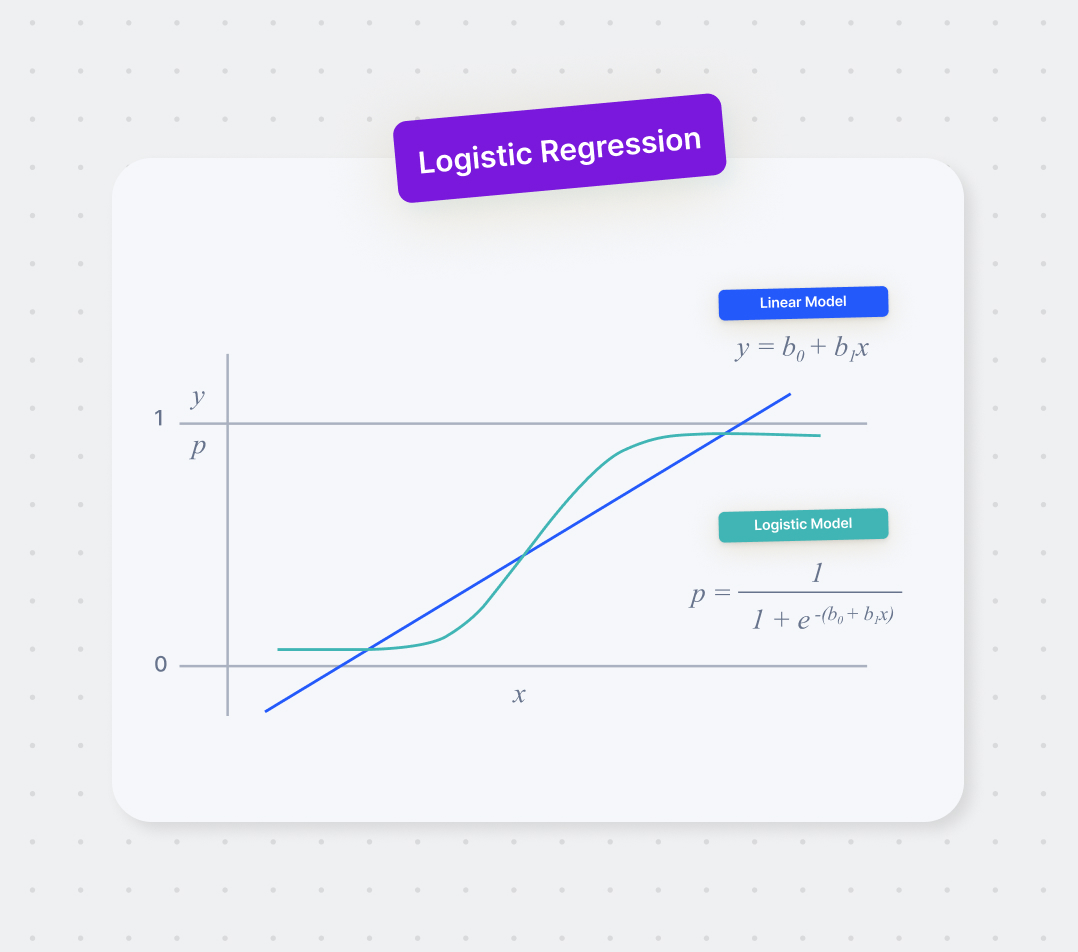

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Increase Max Number of iterations
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
print(log_model)

LogisticRegression(max_iter=1000)


In [ ]:
# training result

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = log_model.predict(x_train)

# Evaluate the model's performance on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report (Training):\n", classification_report(y_train, y_train_pred))

Training Accuracy: 1.0

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        91

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459



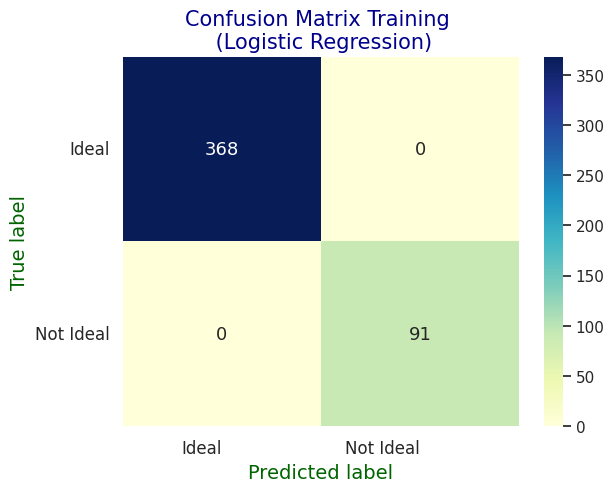

In [ ]:
# show training result with heatmap visualization from the confusion matrix 0 = ideal and 1 = not ideal
confusion_mat_logreg = pd.DataFrame((confusion_matrix(y_train, y_train_pred)),('Ideal', 'Not Ideal'), ('Ideal', 'Not Ideal'))

# make plot confusion matrix
plt.figure()
heatmap_logreg = sns.heatmap(confusion_mat_logreg, annot=True, annot_kws={'size': 13}, fmt ='d', cmap='YlGnBu')
heatmap_logreg.yaxis.set_ticklabels(heatmap_logreg.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
heatmap_logreg.xaxis.set_ticklabels(heatmap_logreg.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
plt.title('Confusion Matrix Training \n (Logistic Regression)', fontsize = 15, color = 'darkblue')
plt.ylabel('True label', fontsize = 14, color = 'darkgreen')
plt.xlabel('Predicted label', fontsize = 14, color = 'darkgreen')
plt.show()

In [ ]:
# Make predictions on the testing model
y_test_pred = log_model.predict(x_test)

# Evaluate the model's performance on the training set
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Testing):\n", classification_report(y_test, y_test_pred))

Testing Accuracy: 1.0

Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        39

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



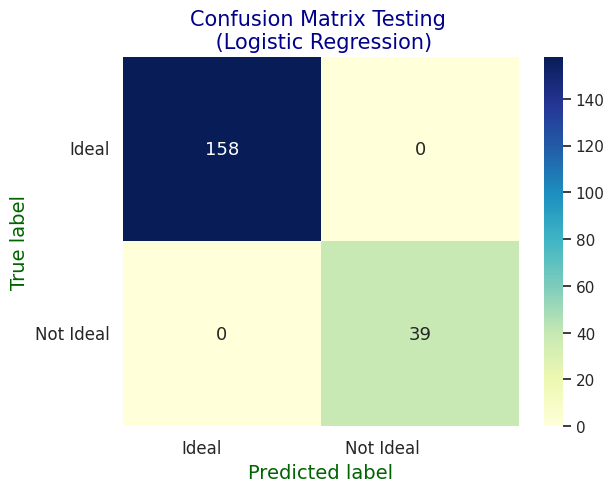

In [ ]:
# show training result with heatmap visualization from the confusion matrix 0 = ideal and 1 = not ideal
con_mat_logreg_test = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),('Ideal', 'Not Ideal'), ('Ideal', 'Not Ideal'))

# make plot confusion matrix
plt.figure()
heatmap_logreg_test = sns.heatmap(con_mat_logreg_test, annot=True, annot_kws={'size': 13}, fmt ='d', cmap='YlGnBu')
heatmap_logreg_test.yaxis.set_ticklabels(heatmap_logreg_test.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
heatmap_logreg_test.xaxis.set_ticklabels(heatmap_logreg_test.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
plt.title('Confusion Matrix Testing \n (Logistic Regression)', fontsize = 15, color = 'darkblue')
plt.ylabel('True label', fontsize = 14, color = 'darkgreen')
plt.xlabel('Predicted label', fontsize = 14, color = 'darkgreen')
plt.show()

### Random Forest
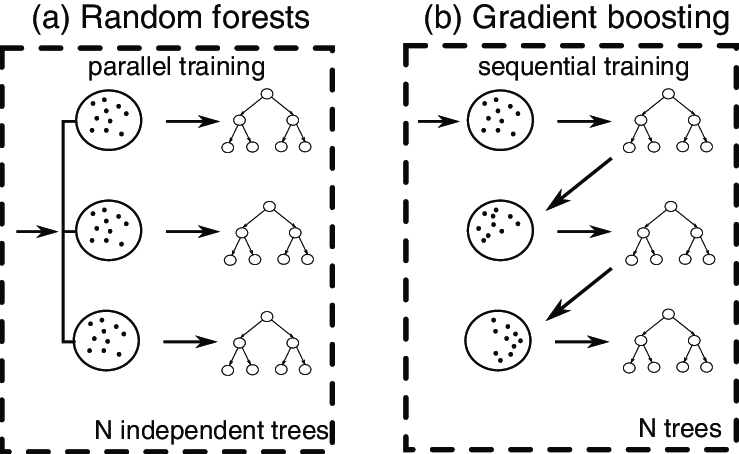

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier().fit(x_train, y_train)
print(RF_model)

RandomForestClassifier()


In [ ]:
from sklearn.metrics import classification_report
y_train_pred = RF_model.predict(x_train)
print('classification report training with random forest:')
print(classification_report(y_train, y_train_pred))

classification report training with random forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        91

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459



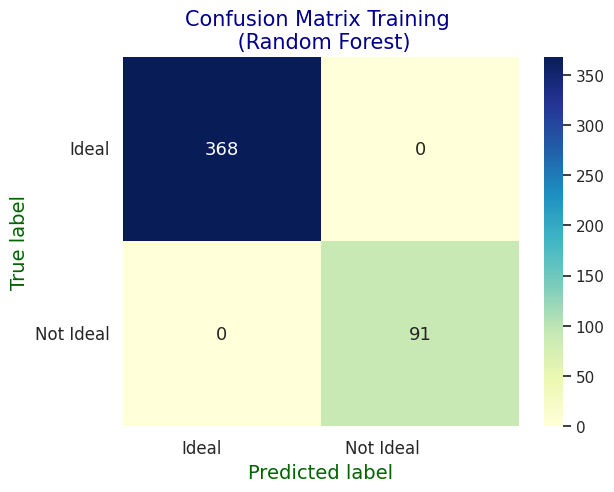

In [ ]:
# show training result with heatmap visualization from the confusion matrix 0 = ideal and 1 = not ideal
confusion_mat_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Ideal', 'Not Ideal'), ('Ideal', 'Not Ideal'))
# make plot confusion matrix
plt.figure()
heatmap_rf = sns.heatmap(confusion_mat_rf, annot=True, annot_kws={'size': 13}, fmt ='d', cmap='YlGnBu')
heatmap_rf.yaxis.set_ticklabels(heatmap_rf.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
heatmap_rf.xaxis.set_ticklabels(heatmap_rf.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
plt.title('Confusion Matrix Training \n (Random Forest)', fontsize = 15, color = 'darkblue')
plt.ylabel('True label', fontsize = 14, color = 'darkgreen')
plt.xlabel('Predicted label', fontsize = 14, color = 'darkgreen')
plt.show()

In [ ]:
y_test_pred = RF_model.predict(x_test)
print('classification report testing with random forest:')
print(classification_report(y_test, y_test_pred))

classification report testing with random forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        39

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



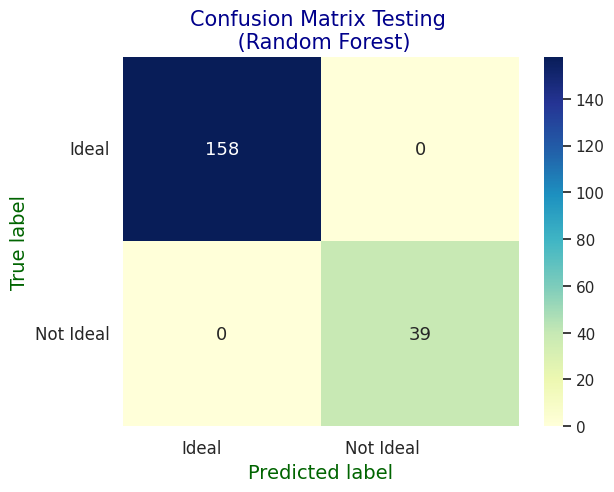

In [ ]:
# show training result with heatmap visualization from the confusion matrix 0 = ideal and 1 = not ideal
con_mat_rf_test= pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Ideal', 'Not Ideal'), ('Ideal', 'Not Ideal'))
# make plot confusion matrix
plt.figure()
heatmap_rf_test = sns.heatmap(con_mat_rf_test, annot=True, annot_kws={'size': 13}, fmt ='d', cmap='YlGnBu')
heatmap_rf_test.yaxis.set_ticklabels(heatmap_rf_test.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
heatmap_rf_test.xaxis.set_ticklabels(heatmap_rf_test.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
plt.title('Confusion Matrix Testing \n (Random Forest)', fontsize = 15, color = 'darkblue')
plt.ylabel('True label', fontsize = 14, color = 'darkgreen')
plt.xlabel('Predicted label', fontsize = 14, color = 'darkgreen')
plt.show()

### Extreme Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier().fit(x_train, y_train)
print(GB_model)

GradientBoostingClassifier()


In [ ]:
from sklearn.metrics import classification_report
y_train_pred = GB_model.predict(x_train)
print('classification report training with gradient boosting:')
print(classification_report(y_train, y_train_pred))

classification report training with gradient boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        91

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459



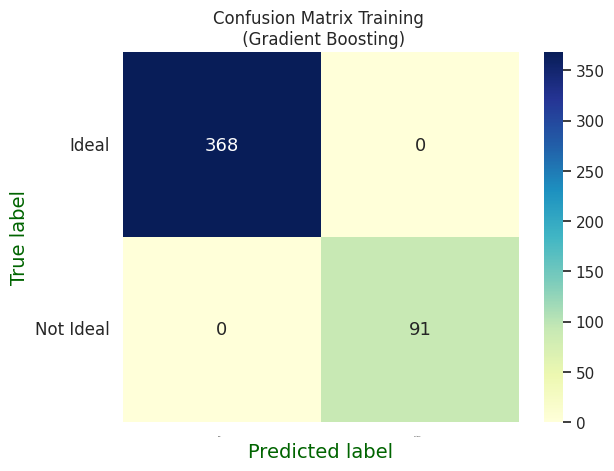

In [ ]:
con_mat_gb_train = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Ideal', 'Not Ideal'), ('Ideal', 'Not Ideal'))

# make heatmap confusion matrix
plt.figure()
heatmap_gb_train = sns.heatmap(con_mat_gb_train, annot=True, annot_kws={'size': 13}, fmt ='d', cmap='YlGnBu')
heatmap_gb_train.yaxis.set_ticklabels(heatmap_gb_train.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
heatmap_gb_train.xaxis.set_ticklabels(heatmap_gb_train.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 1)
plt.title('Confusion Matrix Training \n (Gradient Boosting)')
plt.ylabel('True label', fontsize = 14, color = 'darkgreen')
plt.xlabel('Predicted label', fontsize = 14, color = 'darkgreen')
plt.show()

In [ ]:
y_test_pred = GB_model.predict(x_test)
print('classification report testing with gradient boosting:')
print(classification_report(y_test, y_test_pred))

classification report testing with gradient boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        39

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



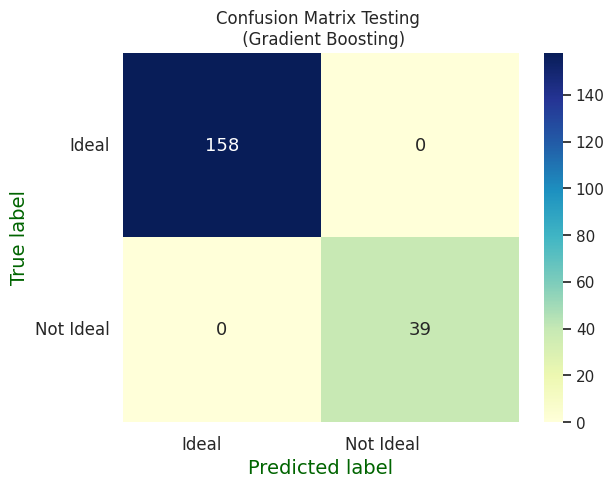

In [ ]:
con_mat_logreg_test = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Ideal', 'Not Ideal'), ('Ideal', 'Not Ideal'))

# make heatmap confusion matrix
plt.figure()
heatmap_gb_test = sns.heatmap(con_mat_logreg_test, annot=True, annot_kws={'size': 13}, fmt ='d', cmap='YlGnBu')
heatmap_gb_test.yaxis.set_ticklabels(heatmap_gb_test.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize =12)
heatmap_gb_test.xaxis.set_ticklabels(heatmap_gb_test.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 12)
plt.title('Confusion Matrix Testing \n (Gradient Boosting)')
plt.ylabel('True label', fontsize = 14, color = 'darkgreen')
plt.xlabel('Predicted label', fontsize = 14, color = 'darkgreen')
plt.show()

### Save Model

In [ ]:
# save in the same directory  of dataset the greatest model

import pickle

best_model = GB_model
dataset_dir = '/content/drive/My Drive/Colab Notebooks'
model_filename = os.path.join(dataset_dir, 'best_model_budget_analysis.pkl')


with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to: {model_filename}")

Best model saved to: /content/drive/My Drive/Colab Notebooks/best_model_budget_analysis.pkl


# EXPORT TO ANOTHER FILE

In [ ]:
# download this file 'World Bank Program Budget and All Funds Analysis Project Portfolio Satya.ipynb' make it to pdf

from google.colab import files
!jupyter nbconvert --to pdf 'World Bank Program Budget and All Funds Analysis Project Portfolio Satya.ipynb'
files.download('World Bank Program Budget and All Funds Analysis Project Portfolio Satya.pdf')

[NbConvertApp] WARNING | pattern 'World Bank Program Budget and All Funds Analysis Project Portfolio Satya.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>